In [1]:
#lets load libarries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
#reading csv files
df1=pd.read_csv('M:\Data science project\Bengaluru_House_Data.csv')

In [3]:
#showing sample data of top
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
#showing sample data of bottom 
df1.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [5]:
#showing info of dataset 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
#droping unnecessary columns
df2=df1.drop(columns=['area_type','availability','society'])
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
#lets see how data is preesnt in size columns(it should in 2bhk or 2bedroom but here it is combined)  
df2['size'].unique ()


array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df2['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [9]:
#lets check nof null valued columns are present in dataset
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [10]:
#from above we found that Balcony conatins nul values, we replace null with some values balcony column is not mandAtory for prediction of price 
#filling balcony null values with mean of its entire balcony column values 
df2.balcony=df2.balcony.fillna(df2.balcony.mean())

In [11]:
#again checking for null values
df2.isnull().sum() 

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [12]:
#null values are present so we are dropping them
df3=df2.dropna()

In [13]:
#we will not get null values now because we dropped all null values but lets check again 
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [14]:
#now lets check size columns wheTher it contains error or not
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
#as we came to know that it contains error i.e it should be in one format but i column both fomrats are combined and moreover it should be numerical
#so we have to split them and take only numerical part.
#this below function helps to achieve out goal
f=lambda x: (int(x.split(" ")[0]))

In [16]:
#after spliting and taking only numerical data we  have to store in a new column
#here i am savinG them in new column named as BHK
df3['BHK']=df3['size'].apply(f)

C:\Users\manik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
#after getting required column we dont need size column so we can drop it
df4=df3.drop(columns=['size'])
df4.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [18]:
#lets find toal_sqft column conatins errors or not
df4.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
#as we came to that it contains error i.e, some values are in range format we need to rectify it by calcualting its average
#this function helps to achieve our goal
def convert_to_avg(x):
    tokens=x.split("-")
    if len(tokens) == 2:
        
        return float(tokens[0])+float(tokens[1])/2;
    try:
        return float(x)
    except:
        return None

    

In [20]:
#lets copy this data to new dataframe and apply above function with previous dataframe and store the result in new data frame
df5=df4.copy()
df5['total_sqft']=df5['total_sqft'].apply(convert_to_avg)

In [21]:
#lets check again if it contains errors or not
df5.total_sqft.unique 

<bound method Series.unique of 0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13246, dtype: float64>

In [22]:
df5.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [23]:
#sometimes any one can ask you what is price of sqft as per location  
#so this below command helps to calculate price per sqft
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [24]:
df5['location'].agg('count')

13246

In [25]:
#lets check whther location column contains errors or not
#below command helps to count no of locations by grouping them and removind first and last null characters
df5.location=df5.location.apply(lambda x: x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values( ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [26]:
#As we came to know there are so  many single occcurence of locations 
#lets find no of locations that has less than 10 count 
location_less_than_10=location_stats[location_stats<=10]
location_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [27]:
len(df5.location.unique())

1293

In [28]:
#as we came to know theres locations having 1 as their count, it is really difficult to represnt data
#so we can group them as other location which locations count is has less than 10
df5['location']=df5['location'].apply(lambda x: 'others' if x in location_less_than_10 else x)
df5.shape

(13246, 7)

In [29]:
#one thing i noticed while cleaing data is requirement of bhk is more but total_sqft is less which is incorrect
#we need to remove this type of errors
#below command helps to find no of columns are there with more bhk requirement and less sqft 
df5[(df5.total_sqft/df5.BHK)<300]


,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
9,others,1020.0,6.0,1.584376,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,1.584376,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,1.000000,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.000000,85.0,8,6296.296296
70,others,500.0,3.0,2.000000,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,others,1400.0,7.0,1.584376,218.0,7,15571.428571
13279,others,1200.0,5.0,1.584376,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,1.000000,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,3.000000,70.0,5,9043.927649


In [30]:
#below commanf helps to negotiate r remove that rows having the above discussed condition
df6=df5[~((df5.total_sqft/df5.BHK)<300)]
df6.head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [31]:
#lets check description about our cleaned data
df6.price_per_sqft.describe()

count     12456.000000
mean       6290.299983
std        4175.619211
min         267.829813
25%        4186.725844
50%        5281.690141
75%        6904.652015
max      176470.588235
Name: price_per_sqft, dtype: float64

In [32]:
#as we can check max price of sqft is so huge it may effect our prediction
#using mean and standard deviation we can remove high cost
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7=remove_pps_outliers(df6)
df7.shape

(10231, 7)

In [33]:
#while cleaning i came to know that in some areas cost of 2 bhk is more than cost of 3 bhk with same sqft which is wrong.
#we needto remove this error by using below function
#1.i am grouping data based on location
#2.calculating mean and standard deviation and count by grouping bhk 
#3.removing that rows where cost of 2bhk is more than cost 3bhk with same sQft. 
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8=remove_bhk_outliers(df7)
df8.shape


(7326, 7)

Text(0, 0.5, 'count')

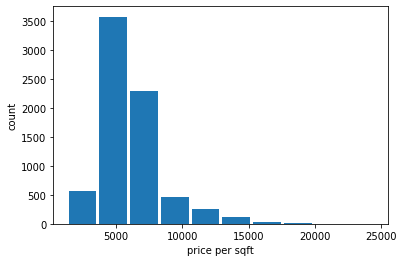

In [34]:
#plotting histograhp using price_per_sqft
plt.hist(df8.price_per_sqft,rwidth=0.9)
plt.xlabel("price per sqft")
plt.ylabel("count")

In [35]:
#if weird to have more bathooms than rooms so we need to remove those rows haivng more bathsrooms than rooms[bhk]. 
df8[df8.bath>8]

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
3773,KR Puram,4600.0,9.0,2.000000,200.0,9,4347.826087
5110,Mico Layout,5000.0,9.0,3.000000,210.0,9,4200.000000
5273,Neeladri Nagar,4000.0,12.0,1.584376,160.0,10,4000.000000
5657,Raja Rajeshwari Nagar,3600.0,9.0,3.000000,240.0,9,6666.666667
8016,others,5000.0,9.0,3.000000,360.0,11,7200.000000
8401,others,11338.0,9.0,1.000000,1000.0,6,8819.897689
8476,others,12000.0,12.0,1.584376,525.0,10,4375.000000
8565,others,10000.0,16.0,1.584376,550.0,16,5500.000000
8751,others,4500.0,9.0,1.584376,500.0,9,11111.111111
9298,others,6000.0,12.0,1.584376,150.0,11,2500.000000


Text(0, 0.5, 'count')

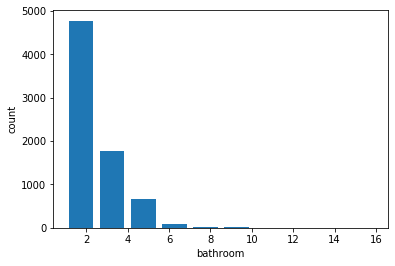

In [36]:
#plotting a graph based on bathrooms
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("bathroom")
plt.ylabel("count")

In [37]:
#removing bathrooms that have more than rooms
df9=df8[df8.bath<df8.BHK+2]
df9.shape

(7252, 7)

Text(0, 0.5, 'count')

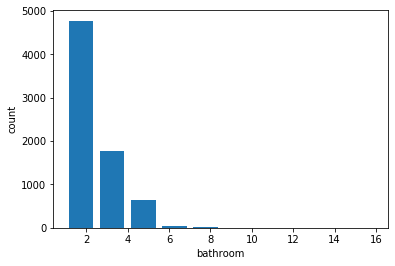

In [38]:
#checking again for baths that have more than rooms 
plt.hist(df9.bath,rwidth=0.8)
plt.xlabel("bathroom")
plt.ylabel("count")

In [39]:
#now removing unwanted columns after cleaning
df10=df9.drop(columns=['balcony','price_per_sqft'])
df10.head(10)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
8,1st Phase JP Nagar,1875.0,3.0,167.0,3
9,1st Phase JP Nagar,1500.0,5.0,85.0,5
10,1st Phase JP Nagar,2065.0,4.0,210.0,3


In [40]:
dummies=pd.get_dummies(df10.location)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df11=pd.concat((df10,dummies.drop(columns=["others"])),axis="columns")
df11

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10222,others,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10223,others,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10226,others,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10227,others,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df12=df11.drop(columns=["location"])
df12.head(2)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#storing all columns in x without price
x=df12.drop(columns=["price"])
x.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#storing price in y
y=df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [45]:
#training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [46]:
#testing data and checing accuracy
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8515492485425744

In [47]:
#prediction function helps to predict the price
def prediction(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    x1=np.zeros(len(x.columns))
    x1[0]=sqft
    x1[1]=bath
    x1[2]=bhk
    if loc_index>=0:
        x1[loc_index]=1
    return lr_clf.predict([x1])[0]    


In [48]:
#PRICE IS IN LACS
prediction("1st Block Jayanagar",2850.0,4,3)

355.7986229408191

In [49]:
prediction("2nd Stage Nagarbhavi",8970,3,6)

804.4003517459162

In [50]:
prediction("1st Phase JP Nagar",1000,2,3)

82.77993243586454